In [1]:
suppressPackageStartupMessages(library(tidyverse))

In [2]:
df <- read_csv("../data/fight_results.csv", col_types = cols())
df <- df %>%
    mutate(win_method_bin = case_when(
        grepl("SUB", win_method) ~ "SUB",
        grepl("DEC", win_method) ~ "DEC",
        grepl("TKO", win_method) ~ "TKO",
        TRUE ~ "other"
    ))
df %>% head()

event_name,date,fighter_1_name,fighter_2_name,fighter_1_str,fighter_2_str,fighter_1_td,fighter_2_td,fighter_1_sub,fighter_2_sub,fighter_1_pass,fighter_2_pass,weight_class,win_method,win_round,win_time,winner,fight_url,win_method_bin
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<time>,<chr>,<chr>,<chr>
UFC_Fight_Night-Lee_vs_Oliveira,"March 14, 2020",Charles Oliveira,Kevin Lee,43,41,0,2,2,0,0,2,Lightweight,"SUB, Guillotine, Choke",3,00:28:00,fighter_1,http://www.ufcstats.com/fight-details/e0b323dae5bf4c90,SUB
UFC_Fight_Night-Lee_vs_Oliveira,"March 14, 2020",Gilbert Burns,Demian Maia,13,4,0,2,0,0,0,1,Welterweight,"KO/TKO, Punch",1,02:34:00,fighter_1,http://www.ufcstats.com/fight-details/5cee1d8f1e43d6f5,TKO
UFC_Fight_Night-Lee_vs_Oliveira,"March 14, 2020",Renato Moicano,Damir Hadzovic,1,1,1,0,1,0,1,0,Lightweight,"SUB, Rear, Naked, Choke",1,00:44:00,fighter_1,http://www.ufcstats.com/fight-details/c26a3f4c08333886,SUB
UFC_Fight_Night-Lee_vs_Oliveira,"March 14, 2020",Nikita Krylov,Johnny Walker,45,37,3,0,0,0,4,2,Light Heavyweight,U-DEC,3,05:00:00,fighter_1,http://www.ufcstats.com/fight-details/5bba49d88db7430f,DEC
UFC_Fight_Night-Lee_vs_Oliveira,"March 14, 2020",Francisco Trinaldo,John Makdessi,55,67,0,0,0,0,0,0,Lightweight,U-DEC,3,05:00:00,fighter_1,http://www.ufcstats.com/fight-details/dc45c8d70e256749,DEC
UFC_Fight_Night-Lee_vs_Oliveira,"March 14, 2020",Brandon Moreno,Jussier Formiga,33,15,0,1,0,1,1,3,Flyweight,U-DEC,3,05:00:00,fighter_1,http://www.ufcstats.com/fight-details/b3c74554c871fbf8,DEC


In [3]:
# make the data tidy for plotting
df_long <- df %>%
    pivot_longer(cols = c(fighter_1_name, fighter_2_name),
                 values_to = "fighter_name", names_to = "fighter") %>%
    mutate(str = if_else(fighter == "fighter_1_name", fighter_1_str, fighter_2_str),
           td = if_else(fighter == "fighter_1_name", fighter_1_td, fighter_2_td),
           sub = if_else(fighter == "fighter_1_name", fighter_1_sub, fighter_2_sub),
           pass = if_else(fighter == "fighter_1_name", fighter_1_pass, fighter_2_pass)) %>%
    select(fighter, fighter_name, str, td, sub, pass, winner, win_method, win_method_bin) %>%
    mutate(fighter = gsub("_name", "", fighter),
           winner = ifelse(fighter == winner, 1, 0),
           winner = as_factor(winner))

df_long %>% head()

fighter,fighter_name,str,td,sub,pass,winner,win_method,win_method_bin
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
fighter_1,Charles Oliveira,43,0,2,0,1,"SUB, Guillotine, Choke",SUB
fighter_2,Kevin Lee,41,2,0,2,0,"SUB, Guillotine, Choke",SUB
fighter_1,Gilbert Burns,13,0,0,0,1,"KO/TKO, Punch",TKO
fighter_2,Demian Maia,4,2,0,1,0,"KO/TKO, Punch",TKO
fighter_1,Renato Moicano,1,1,1,1,1,"SUB, Rear, Naked, Choke",SUB
fighter_2,Damir Hadzovic,1,0,0,0,0,"SUB, Rear, Naked, Choke",SUB


## What variables influence winning?

There are several different ways you can win in the UFC. In the data, there are:

In [4]:
df %>%
    group_by(win_method, win_method_bin) %>%
    summarise(count = n()) %>%
    select(win_method_bin, win_method, count) %>%
    arrange(win_method_bin, desc(count))

win_method_bin,win_method,count
<chr>,<chr>,<int>
DEC,U-DEC,856
DEC,S-DEC,257
DEC,M-DEC,30
other,CNC,6
other,DQ,6
other,Overturned,6
other,"Overturned, Punch",3
other,"Overturned, Kick",1
SUB,"SUB, Rear, Naked, Choke",179


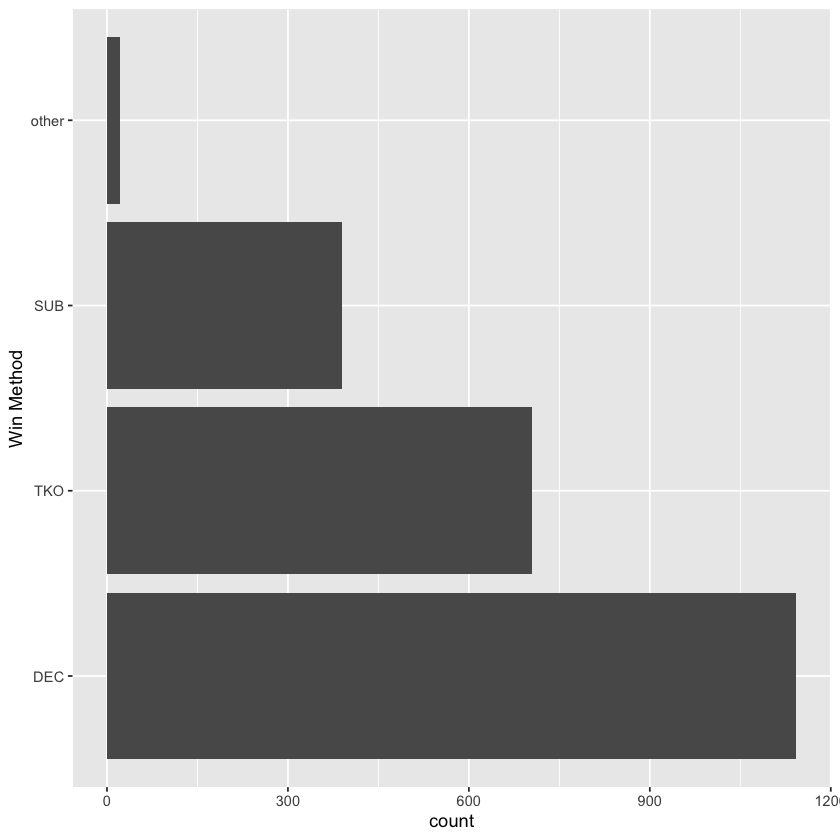

In [5]:
df %>%
    ggplot(aes(y = fct_infreq(win_method_bin))) + 
    geom_bar() + labs(y = "Win Method")

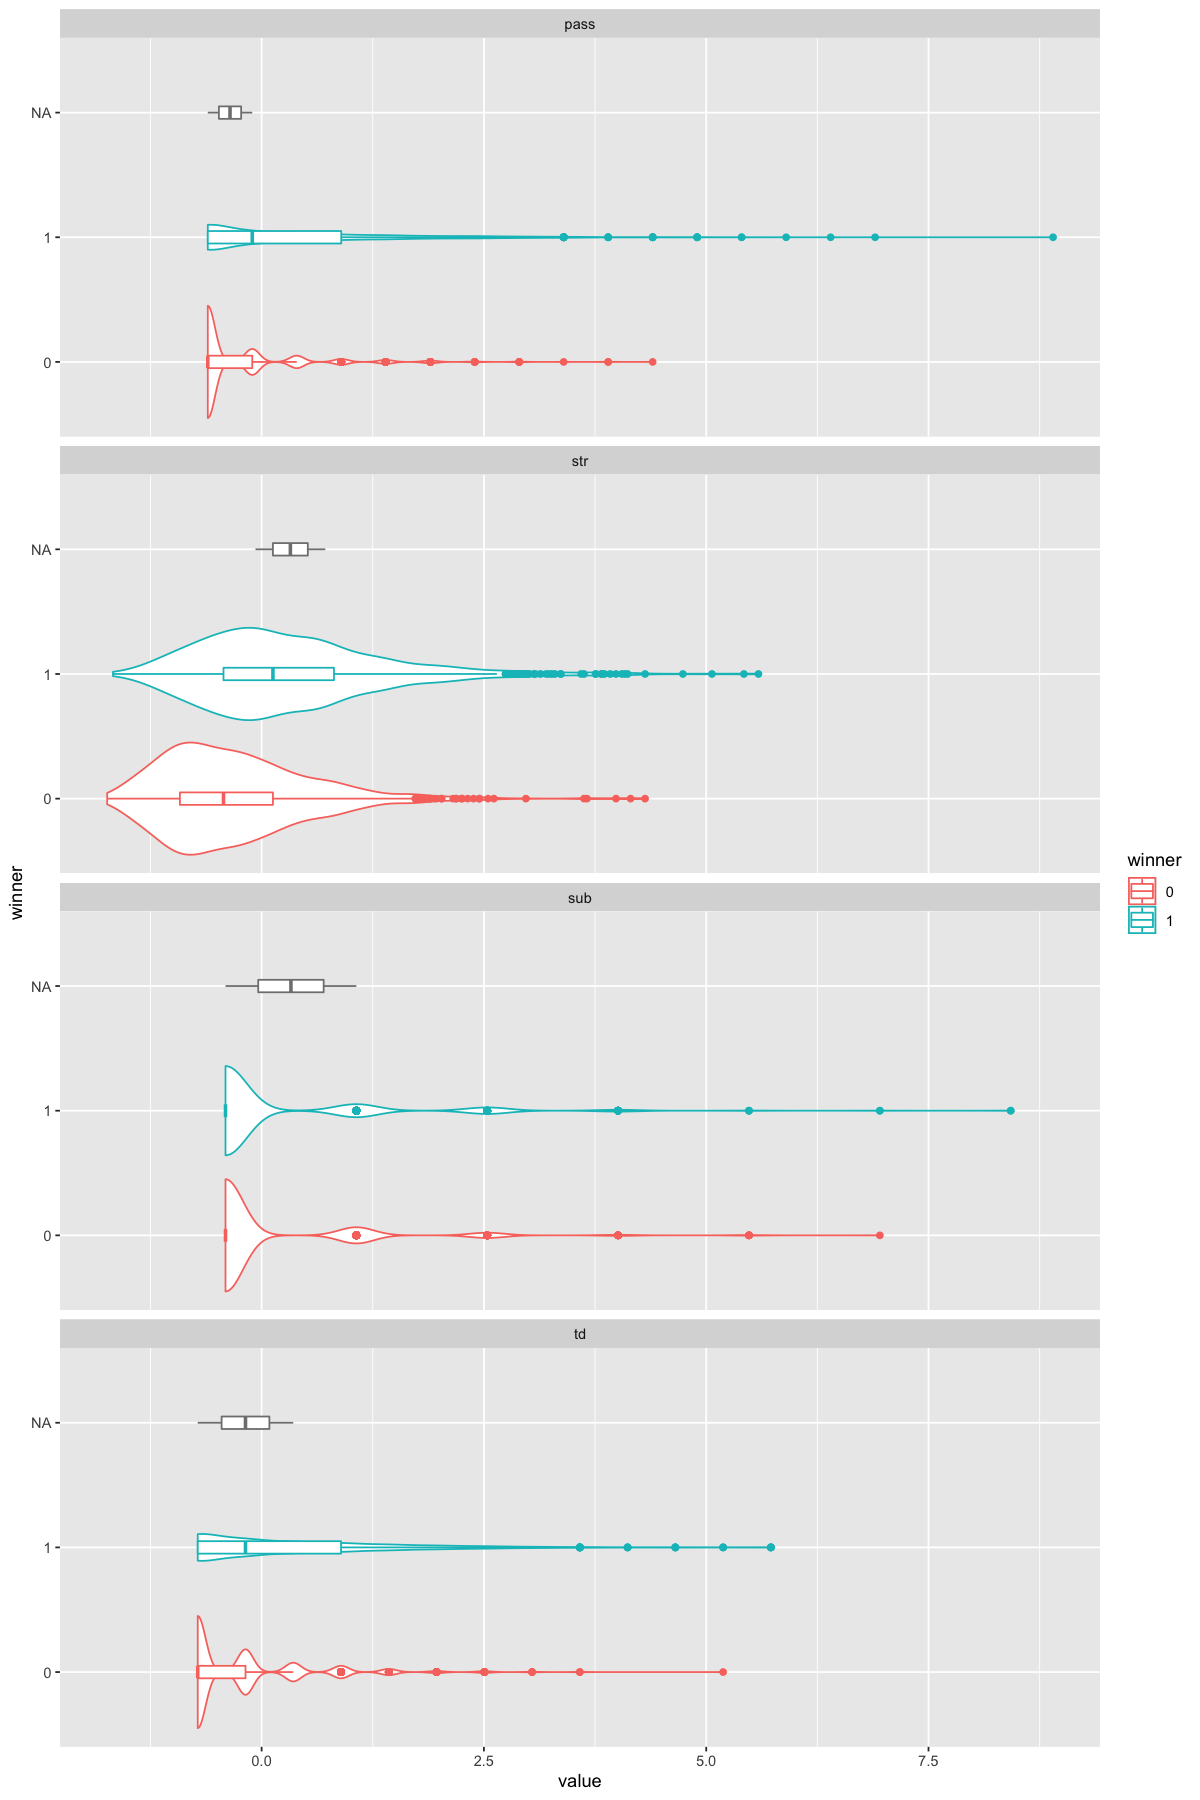

In [10]:
options(repr.plot.width=10, repr.plot.height=15)

scale2 <- function(x, na.rm = FALSE) (x - mean(x, na.rm = na.rm)) / sd(x, na.rm)

df_long %>%
    dplyr::filter(str_detect(win_method, "DEC")) %>%
    mutate(winner = as_factor(winner)) %>%
    mutate_at(c("str", "td", "sub", "pass"), scale2) %>%
    pivot_longer(cols = c(str, td, sub, pass)) %>%
    ggplot(aes(x = value, y = winner, colour = winner)) +
    geom_violin() +
    geom_boxplot(width = 0.1) +
    facet_wrap(~name, ncol = 1) 

In [7]:
df_long %>%
    dplyr::filter(win_method_bin == "DEC") %>%
#     dplyr::filter(winner != 0 & winner != 1)
    group_by(winner) %>%
    summarise(n = n())

Warning message:
“Factor `winner` contains implicit NA, consider using `forcats::fct_explicit_na`”


winner,n
<fct>,<int>
0,1164
1,1120
NA,2
